In [14]:
import pandas as pd
import numpy as np
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import requests
from math import radians, sin, cos, sqrt, atan2
from datetime import datetime, timedelta
import numpy as np
from scipy.spatial.distance import pdist, squareform
from IPython.display import display
import glob

In [2]:
def get_DataFrame(file_name, local_path='data/'):
    """
    Tries to load a Parquet file from a local path.
    If the file is not found, downloads it from TLC's cloudfront URL and saves it locally.
    
    Parameters:
    - file_name (str): Name of the file to load/download (e.g., 'yellow_tripdata_2024-07.parquet').
    - local_path (str): Path to the local directory where the file is stored or will be saved. Default is 'data/'.
    
    Returns:
    - pd.DataFrame: DataFrame containing the data from the Parquet file.
    """
    # Ensure the local path exists
    os.makedirs(local_path, exist_ok=True)

    # Construct file paths
    local_file = os.path.join(local_path, file_name)
    tlc_url = f"https://d37ci6vzurychx.cloudfront.net/trip-data/{file_name}"

    try:
        # Try reading the file from the local path
        print(f"Trying to load {file_name} from {local_file}")
        df = pd.read_parquet(local_file)
        return df

    except FileNotFoundError:
        print(f"{file_name} not found locally. Attempting to download from {tlc_url}")

        # Download the file from TLC's cloudfront URL
        try:
            urllib.request.urlretrieve(tlc_url, local_file)
            print(f"Downloaded {file_name} to {local_file}")
            # Load the downloaded file
            df = pd.read_parquet(local_file)
            return df
        except Exception as e:
            print(f"Failed to download {file_name}: {e}")
            raise

In [ ]:
jan_2023 = 'fhvhv_tripdata_2023-01.parquet'
feb_2023 = 'fhvhv_tripdata_2023-02.parquet'
mar_2023 = 'fhvhv_tripdata_2023-03.parquet'
apr_2023 = 'fhvhv_tripdata_2023-04.parquet'
may_2023 = 'fhvhv_tripdata_2023-05.parquet'
jun_2023 = 'fhvhv_tripdata_2023-06.parquet'
jul_2023 = 'fhvhv_tripdata_2023-07.parquet'
aug_2023 = 'fhvhv_tripdata_2023-08.parquet'
sep_2023 = 'fhvhv_tripdata_2023-09.parquet'
oct_2023 = 'fhvhv_tripdata_2023-10.parquet'
nov_2023 = 'fhvhv_tripdata_2023-11.parquet'
dec_2023 = 'fhvhv_tripdata_2023-12.parquet'

jan_2024 = 'fhvhv_tripdata_2024-01.parquet'
feb_2024 = 'fhvhv_tripdata_2024-02.parquet'
mar_2024 = 'fhvhv_tripdata_2024-03.parquet'
apr_2024 = 'fhvhv_tripdata_2024-04.parquet'
may_2024 = 'fhvhv_tripdata_2024-05.parquet'
jun_2024 = 'fhvhv_tripdata_2024-06.parquet'
jul_2024 = 'fhvhv_tripdata_2024-07.parquet'

In [3]:
apr_2024 = 'fhvhv_tripdata_2024-04.parquet'

test = get_DataFrame(apr_2024)
test.info()

Trying to load fhvhv_tripdata_2024-04.parquet from data/fhvhv_tripdata_2024-04.parquet
fhvhv_tripdata_2024-04.parquet not found locally. Attempting to download from https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-04.parquet
Downloaded fhvhv_tripdata_2024-04.parquet to data/fhvhv_tripdata_2024-04.parquet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19733038 entries, 0 to 19733037
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_pass

In [5]:
df = pd.read_parquet('/Users/cheng/Desktop/fhvhv_tripdata_2024-04.parquet')
df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-04-01 00:00:58,2024-04-01 00:02:52,2024-04-01 00:04:27,2024-04-01 00:19:30,37,102,2.94,...,1.20,0.00,0.0,0.0,12.77,N,N,N,N,N
1,HV0003,B03404,B03404,2024-04-01 00:21:17,2024-04-01 00:24:08,2024-04-01 00:24:39,2024-04-01 00:34:44,198,37,1.81,...,1.03,0.00,0.0,0.0,8.34,N,N,N,N,N
2,HV0003,B03404,B03404,2024-04-01 00:06:56,2024-04-01 00:12:28,2024-04-01 00:12:49,2024-04-01 00:36:01,138,261,16.11,...,4.68,2.75,2.5,0.0,35.44,N,N,N,N,N
3,HV0003,B03404,B03404,2024-03-31 23:56:07,2024-03-31 23:59:51,2024-04-01 00:00:23,2024-04-01 00:04:15,29,210,0.59,...,0.79,0.00,0.0,0.0,5.39,N,N,N,N,N
4,HV0003,B03404,B03404,2024-04-01 00:05:13,2024-04-01 00:09:27,2024-04-01 00:10:48,2024-04-01 00:15:51,210,210,1.20,...,0.74,0.00,0.0,0.0,5.38,Y,N,N,N,N


In [29]:
df['DOLocationID'].nunique()

262

In [8]:
# Randomly sample 1% data (19,733,038 to 197,330)


# Function to load the dataset
def get_DataFrame(file_path):
    """
    Load a Parquet file into a pandas DataFrame.
    
    Parameters:
    -----------
    file_path : str
        Path to the Parquet file.
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame containing the loaded data.
    """
    return pd.read_parquet(file_path)


# Function to perform 1% random sampling
def simple_random_sample(df, sample_fraction=0.01, random_state=42):
    """
    Take a random sample from the dataset.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing traffic data.
    sample_fraction : float, default=0.01
        Fraction of data to sample.
    random_state : int, default=42
        Random seed for reproducibility.
    
    Returns:
    --------
    pandas.DataFrame
        Sampled dataframe.
    dict
        Basic sampling statistics.
    """
    sample_size = int(len(df) * sample_fraction)
    sampled_df = df.sample(n=sample_size, random_state=random_state)
    
    stats = {
        'original_total': len(df),
        'sampled_total': len(sampled_df),
        'overall_sampling_ratio': sample_fraction * 100
    }
    
    return sampled_df, stats


# Function to print sampling summary
def print_simple_summary(stats):
    """
    Print a simple summary of the sampling results.
    
    Parameters:
    -----------
    stats : dict
        Dictionary containing sampling statistics.
    """
    print(f"\nTotal Records:")
    print(f"Original: {stats['original_total']:,}")
    print(f"Sampled: {stats['sampled_total']:,}")
    print(f"Overall sampling ratio: {stats['overall_sampling_ratio']:.1f}%")

    
# Your Info
apr_2024 = 'fhvhv_tripdata_2024-04.parquet'
file_path = '/Users/cheng/Desktop/fhvhv_tripdata_2024-04.parquet'
test = get_DataFrame(apr_2024)

# Perform sampling on the dataset
sampled_df, stats = simple_random_sample(test, sample_fraction=0.01)
print_simple_summary(stats)



Total Records:
Original: 19,733,038
Sampled: 197,330
Overall sampling ratio: 1.0%


In [11]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the full dataset
file_path = '/Users/cheng/Desktop/fhvhv_tripdata_2024-04.parquet'
df = pd.read_parquet(file_path)

# Function to create a stratified sample
def simple_stratified_sample(df, sample_fraction=0.01, random_state=42):
    df['Month-Year'] = pd.to_datetime(df['pickup_datetime']).dt.to_period('M')
    monthly_counts = df['Month-Year'].value_counts()
    monthly_sample_sizes = (monthly_counts * sample_fraction).round().astype(int)
    sampled_df = pd.DataFrame()

    for month, sample_size in monthly_sample_sizes.items():
        monthly_data = df[df['Month-Year'] == month]
        month_sample = monthly_data.sample(n=sample_size, random_state=random_state)
        sampled_df = pd.concat([sampled_df, month_sample])

    sampled_df.reset_index(drop=True, inplace=True)
    return sampled_df

# Sampling 1% of the dataset
sampled_df = simple_stratified_sample(df, sample_fraction=0.01)

# Comparison function
def compare_traffic_stats(df, sampled_df):
    numeric_cols = [
        'trip_miles', 'sales_tax', 'congestion_surcharge', 'airport_fee', 
        'tips', 'driver_pay'
    ]
    
    results = {
        'numeric_stats': {},
        'categorical_distributions': {},
        'temporal_patterns': {}
    }
    
    # 1. Numeric Statistics Comparison
    for col in numeric_cols:
        if col in df.columns and col in sampled_df.columns:
            full_stats = df[col].describe()
            sample_stats = sampled_df[col].describe()
            pct_diff = {
                stat: ((sample_stats[stat] - full_stats[stat]) / full_stats[stat] * 100)
                for stat in ['mean', 'std', '50%'] if full_stats[stat] != 0
            }
            results['numeric_stats'][col] = {
                'full': full_stats.to_dict(),
                'sampled': sample_stats.to_dict(),
                'percent_difference': pct_diff,
                'ks_test_pvalue': stats.ks_2samp(df[col].dropna(), sampled_df[col].dropna())[1]
            }
    
    # 2. Temporal Patterns
    full_hourly = df['pickup_datetime'].dt.hour.value_counts(normalize=True)
    sample_hourly = sampled_df['pickup_datetime'].dt.hour.value_counts(normalize=True)
    results['temporal_patterns']['hourly'] = {
        'full': full_hourly.to_dict(),
        'sampled': sample_hourly.to_dict()
    }
    
    return results

# Print Comparison Function
def print_comparison_results(results):
    print("\nNUMERIC VARIABLES COMPARISON")
    print("=" * 80)
    for col, stats in results['numeric_stats'].items():
        print(f"\n{col}:")
        print("-" * 50)
        metrics = ['mean', 'std', '50%', 'min', 'max']
        print(f"{'Metric':<12} {'Full':>12} {'Sampled':>12} {'% Diff':>10}")
        print("-" * 50)
        for metric in metrics:
            full_val = stats['full'][metric]
            sample_val = stats['sampled'][metric]
            if metric in stats['percent_difference']:
                pct_diff = stats['percent_difference'][metric]
                print(f"{metric:<12} {full_val:>12.2f} {sample_val:>12.2f} {pct_diff:>10.2f}%")
            else:
                print(f"{metric:<12} {full_val:>12.2f} {sample_val:>12.2f} {'N/A':>10}")
        print(f"KS test p-value: {stats['ks_test_pvalue']:.4f}")
    
    print("\nHOURLY DISTRIBUTION")
    print("=" * 80)
    print(f"{'Hour':<6} {'Full %':>10} {'Sampled %':>10} {'Diff':>10}")
    print("-" * 40)
    hours = range(24)
    for hour in hours:
        full_pct = results['temporal_patterns']['hourly']['full'].get(hour, 0) * 100
        sample_pct = results['temporal_patterns']['hourly']['sampled'].get(hour, 0) * 100
        diff = sample_pct - full_pct
        print(f"{hour:<6} {full_pct:>10.2f} {sample_pct:>10.2f} {diff:>10.2f}")

# Generate and print comparison
comparison_results = compare_traffic_stats(df, sampled_df)
print_comparison_results(comparison_results)



NUMERIC VARIABLES COMPARISON

trip_miles:
--------------------------------------------------
Metric               Full      Sampled     % Diff
--------------------------------------------------
mean                 5.04         5.02      -0.28%
std                  5.83         5.80      -0.62%
50%                  2.98         2.97      -0.34%
min                  0.00         0.00        N/A
max                279.31       137.60        N/A
KS test p-value: 0.6144

sales_tax:
--------------------------------------------------
Metric               Full      Sampled     % Diff
--------------------------------------------------
mean                 2.19         2.18      -0.36%
std                  1.86         1.84      -0.73%
50%                  1.66         1.66       0.00%
min                  0.00         0.00        N/A
max                112.58        44.31        N/A
KS test p-value: 0.4667

congestion_surcharge:
--------------------------------------------------
Metric       

- The sampled dataset’s mean and median are very close to the full dataset, with only a -0.28% and -0.34% difference, respectively, indicating that the sample effectively represents the average trip distances.
- KS Test p-value 0.6144 > 0.05: suggesting the sample’s distribution closely matches the full dataset.
- p-value 1.0 for Congestion Surcharge and Airport Fee: meaning the sample and full dataset distributions are indistinguishable.

# Create In/Out Flow

In [17]:
import pandas as pd
import numpy as np

# Assuming `sampled_df` is your dataset
def create_complete_sorted_station_dataset(df):
    """
    Creates a complete dataset with all hours for each location ID, sorted by time.
    
    Parameters:
    df (pandas.DataFrame): Original trip dataset
    
    Returns:
    pandas.DataFrame: Complete dataset with all hours, sorted by time
    """
    # Extract unique stations from pickup location ID
    stations = df['PULocationID'].unique()
    
    # Create complete date range based on `pickup_datetime`
    start_date = pd.to_datetime(df['pickup_datetime']).min()
    end_date = pd.to_datetime(df['dropoff_datetime']).max()
    
    # Create hourly date range
    date_range = pd.date_range(start=start_date, end=end_date, freq='H')
    
    # Generate all possible station and hour combinations
    station_hours = []
    for date in date_range:
        for station in stations:
            station_hours.append({
                'LocationID': station,
                'DateTime': date,
                'Date': date.date(),
                'Hour': date.hour
            })
    
    # Create complete dataset
    complete_df = pd.DataFrame(station_hours)
    
    # Convert date columns in the original dataset
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
    
    # Calculate outflows (trips starting from location)
    outflows = df.groupby(['PULocationID', 'pickup_datetime']).size().reset_index(name='Outflow_Count')
    
    # Calculate inflows (trips ending at location)
    inflows = df.groupby(['DOLocationID', 'dropoff_datetime']).size().reset_index(name='Inflow_Count')
    
    # Merge outflows with the complete dataset
    merged_df = pd.merge(
        complete_df, 
        outflows.rename(columns={'PULocationID': 'LocationID', 'pickup_datetime': 'DateTime'}),
        on=['LocationID', 'DateTime'],
        how='left'
    )
    
    # Merge inflows with the complete dataset
    merged_df = pd.merge(
        merged_df,
        inflows.rename(columns={'DOLocationID': 'LocationID', 'dropoff_datetime': 'DateTime'}),
        on=['LocationID', 'DateTime'],
        how='left'
    )
    
    # Fill NaN values
    merged_df['Outflow_Count'] = merged_df['Outflow_Count'].fillna(0)
    merged_df['Inflow_Count'] = merged_df['Inflow_Count'].fillna(0)
    
    # Calculate Net Flow
    merged_df['Net_Flow'] = merged_df['Inflow_Count'] - merged_df['Outflow_Count']
    
    # Add activity status
    merged_df['Activity_Status'] = np.where(
        (merged_df['Inflow_Count'] > 0) | (merged_df['Outflow_Count'] > 0),
        'Active',
        'Not Active'
    )
    
    # Add time-based columns
    merged_df['Day_of_Week'] = merged_df['DateTime'].dt.day_name()
    merged_df['Month'] = merged_df['DateTime'].dt.month_name()
    
    # Sort by DateTime and then LocationID
    merged_df = merged_df.sort_values(['DateTime', 'LocationID'])
    
    return merged_df

# Apply function to your dataset
complete_station_data = create_complete_sorted_station_dataset(sampled_df)

# Display the result
print(complete_station_data.head())


     LocationID            DateTime        Date  Hour  Outflow_Count  \
225           3 2024-04-01 00:00:35  2024-04-01     0            0.0   
54            4 2024-04-01 00:00:35  2024-04-01     0            0.0   
244           5 2024-04-01 00:00:35  2024-04-01     0            0.0   
122           6 2024-04-01 00:00:35  2024-04-01     0            0.0   
56            7 2024-04-01 00:00:35  2024-04-01     0            0.0   

     Inflow_Count  Net_Flow Activity_Status Day_of_Week  Month  
225           0.0       0.0      Not Active      Monday  April  
54            0.0       0.0      Not Active      Monday  April  
244           0.0       0.0      Not Active      Monday  April  
122           0.0       0.0      Not Active      Monday  April  
56            0.0       0.0      Not Active      Monday  April  


In [20]:
ordered_df = complete_station_data.sort_values(by='Inflow_Count', ascending=False)
ordered_df.head()

,LocationID,DateTime,Date,Hour,Outflow_Count,Inflow_Count,Net_Flow,Activity_Status,Day_of_Week,Month
149861,138,2024-04-25 07:00:35,2024-04-25,7,0.0,1.0,1.0,Active,Thursday,April
63586,78,2024-04-11 07:00:35,2024-04-11,7,0.0,1.0,1.0,Active,Thursday,April
165128,66,2024-04-27 18:00:35,2024-04-27,18,0.0,1.0,1.0,Active,Saturday,April
76335,112,2024-04-13 09:00:35,2024-04-13,9,0.0,1.0,1.0,Active,Saturday,April
115399,112,2024-04-19 17:00:35,2024-04-19,17,0.0,1.0,1.0,Active,Friday,April


In [21]:
# 10%


import pandas as pd
import numpy as np

# Load dataset
file_path = '/Users/cheng/Desktop/fhvhv_tripdata_2024-04.parquet'
df = pd.read_parquet(file_path)

# Sample 10% of the data
sampled_df = df.sample(frac=0.1, random_state=42)

# Convert pickup and dropoff times to datetime
sampled_df['pickup_datetime'] = pd.to_datetime(sampled_df['pickup_datetime'])
sampled_df['dropoff_datetime'] = pd.to_datetime(sampled_df['dropoff_datetime'])

# Round times to the nearest hour for aggregation
sampled_df['pickup_hour'] = sampled_df['pickup_datetime'].dt.floor('H')
sampled_df['dropoff_hour'] = sampled_df['dropoff_datetime'].dt.floor('H')

# Calculate outflows by counting trips that start at each PULocationID per hour
outflows = (
    sampled_df.groupby(['PULocationID', 'pickup_hour'])
    .size()
    .reset_index(name='Outflow_Count')
    .rename(columns={'PULocationID': 'LocationID', 'pickup_hour': 'DateTime'})
)

# Calculate inflows by counting trips that end at each DOLocationID per hour
inflows = (
    sampled_df.groupby(['DOLocationID', 'dropoff_hour'])
    .size()
    .reset_index(name='Inflow_Count')
    .rename(columns={'DOLocationID': 'LocationID', 'dropoff_hour': 'DateTime'})
)

# Merge inflow and outflow data on LocationID and DateTime
flow_data = pd.merge(outflows, inflows, on=['LocationID', 'DateTime'], how='outer').fillna(0)

# Calculate net flow and activity status
flow_data['Net_Flow'] = flow_data['Inflow_Count'] - flow_data['Outflow_Count']
flow_data['Activity_Status'] = np.where(
    (flow_data['Inflow_Count'] > 0) | (flow_data['Outflow_Count'] > 0), 'Active', 'Not Active'
)

# Extract additional date information
flow_data['Date'] = flow_data['DateTime'].dt.date
flow_data['Hour'] = flow_data['DateTime'].dt.hour
flow_data['Day_of_Week'] = flow_data['DateTime'].dt.day_name()
flow_data['Month'] = flow_data['DateTime'].dt.strftime('%B')

# Order by Outflow_Count in descending order
flow_data_sorted = flow_data.sort_values(by='Outflow_Count', ascending=False)

# Display the top rows of the resulting dataframe
print(flow_data_sorted.head())



       LocationID            DateTime  Outflow_Count  Inflow_Count  Net_Flow  \
82281         138 2024-04-15 22:00:00          139.0           6.0    -133.0   
47611          79 2024-04-21 00:00:00          139.0         106.0     -33.0   
48502          80 2024-04-28 03:00:00          139.0          20.0    -119.0   
47586          79 2024-04-19 23:00:00          137.0         113.0     -24.0   
82582         138 2024-04-29 20:00:00          137.0          19.0    -118.0   

      Activity_Status        Date  Hour Day_of_Week  Month  
82281          Active  2024-04-15    22      Monday  April  
47611          Active  2024-04-21     0      Sunday  April  
48502          Active  2024-04-28     3      Sunday  April  
47586          Active  2024-04-19    23      Friday  April  
82582          Active  2024-04-29    20      Monday  April  


In [30]:
flow_data_sorted.head()

,LocationID,DateTime,Outflow_Count,Inflow_Count,Net_Flow,Activity_Status,Date,Hour,Day_of_Week,Month,is_weekend
82281,138,2024-04-15 22:00:00,139.0,6.0,-133.0,Active,2024-04-15,22,Monday,April,False
47611,79,2024-04-21 00:00:00,139.0,106.0,-33.0,Active,2024-04-21,0,Sunday,April,True
48502,80,2024-04-28 03:00:00,139.0,20.0,-119.0,Active,2024-04-28,3,Sunday,April,True
47586,79,2024-04-19 23:00:00,137.0,113.0,-24.0,Active,2024-04-19,23,Friday,April,False
82582,138,2024-04-29 20:00:00,137.0,19.0,-118.0,Active,2024-04-29,20,Monday,April,False



=== Basic Information ===

Dataset Shape: (174636, 10)

Number of Unique Locations: 261

Date Range: 2024-04-01 00:00:00 to 2024-05-01 01:00:00


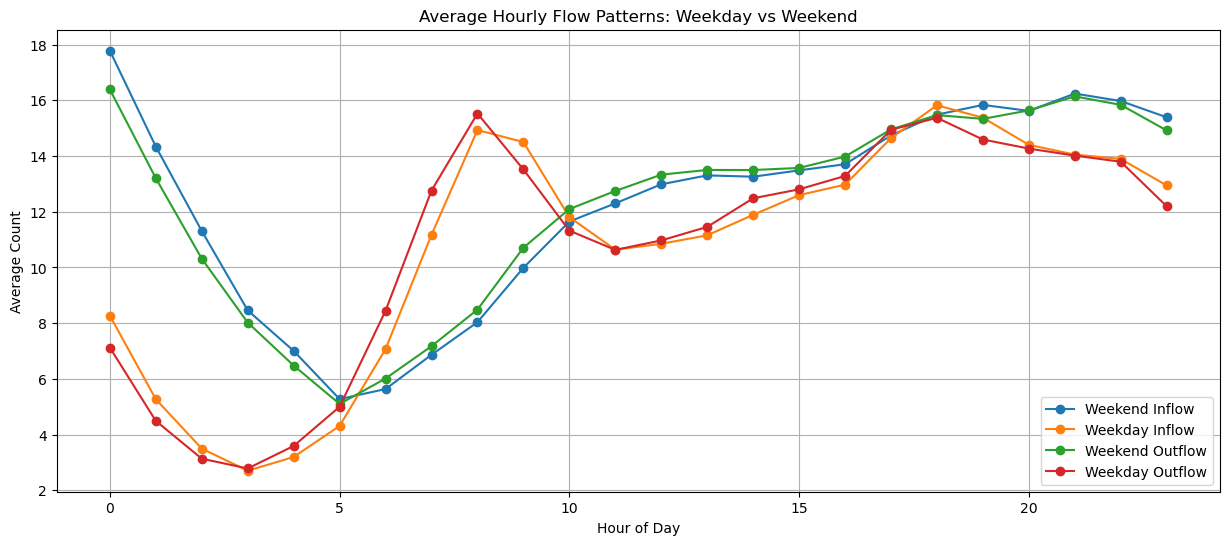

<Figure size 1200x600 with 0 Axes>

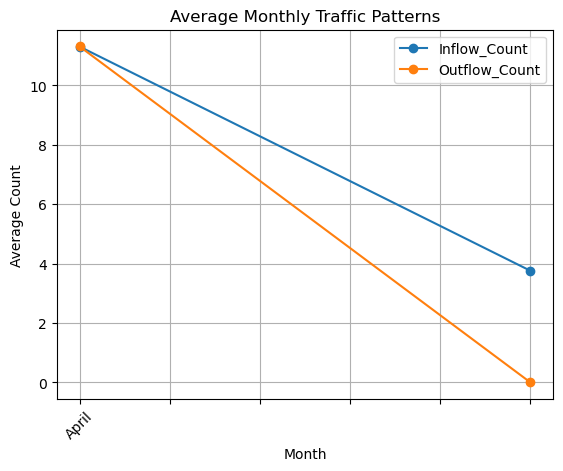


=== Top 10 Busiest Locations ===
           Inflow_Count                 Outflow_Count                  \
                   mean      sum    std          mean      sum    std   
LocationID                                                              
265              111.89  80781.0  58.53          0.10     72.0   0.32   
138               59.57  42654.0  44.45         55.05  39417.0  38.35   
132               57.79  41667.0  33.84         50.28  36252.0  28.21   
61                37.07  26728.0  18.88         35.41  25528.0  16.43   
79                30.08  21687.0  26.08         36.69  26455.0  27.17   
37                29.79  21478.0  19.28         29.39  21190.0  16.55   
76                29.66  21382.0  12.66         29.70  21416.0  12.98   
161               29.61  21348.0  23.51         32.65  23544.0  25.50   
68                29.52  21287.0  12.82         30.31  21852.0  15.06   
230               29.48  21254.0  17.34         33.55  24190.0  18.73   

           Net_F

<Figure size 1500x600 with 0 Axes>

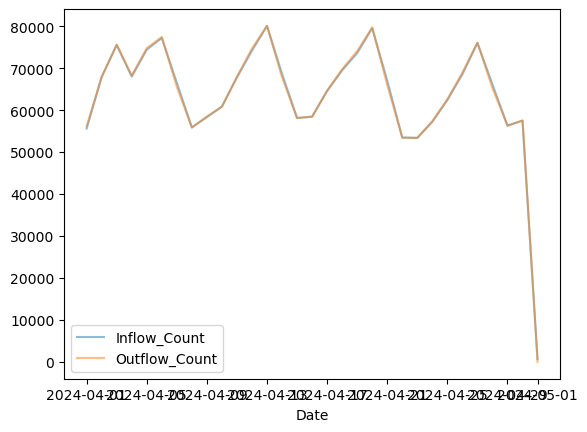

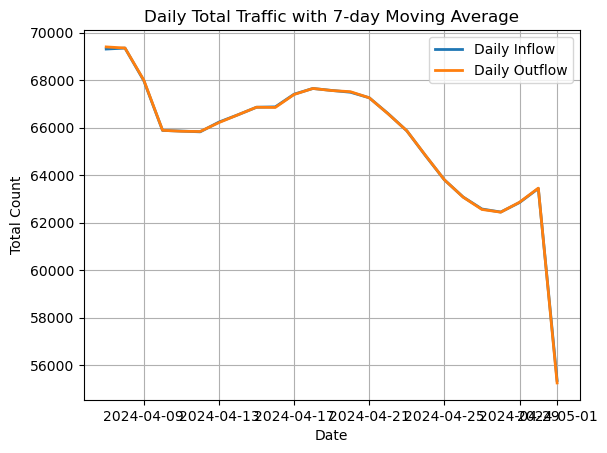


=== Key Statistics ===
total_trips: 1973304.0
avg_daily_trips: 63654.967741935485
peak_day: 2024-04-13
peak_hour: 18
most_active_location: 265


{'location_metrics':            Inflow_Count                 Outflow_Count                Net_Flow  \
                    mean      sum    std          mean      sum   std     mean   
 LocationID                                                                      
 1                 22.10  14231.0  14.21          0.00      0.0  0.00    22.10   
 2                  0.40      2.0   0.55          0.60      3.0  0.55    -0.20   
 3                  5.75   4096.0   3.54          6.18   4397.0  3.78    -0.42   
 4                  7.42   5323.0   6.15          8.69   6232.0  5.26    -1.27   
 5                  0.95    474.0   0.90          1.15    576.0  1.03    -0.20   
 ...                 ...      ...    ...           ...      ...   ...      ...   
 260               11.82   8525.0   5.63         11.22   8093.0  5.13     0.60   
 261               10.06   7205.0   5.69         10.18   7288.0  6.23    -0.12   
 262                8.68   6213.0   5.43         10.28   7361.0  6.48    -1.60

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_flow_data(df):
    """
    Perform exploratory data analysis on flow data
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame with traffic flow data
    """
    
    # 1. Basic Data Info
    print("\n=== Basic Information ===")
    print("\nDataset Shape:", df.shape)
    print("\nNumber of Unique Locations:", df['LocationID'].nunique())
    print("\nDate Range:", df['DateTime'].min(), "to", df['DateTime'].max())
    
    # 2. Convert DateTime if not already datetime
    if not pd.api.types.is_datetime64_any_dtype(df['DateTime']):
        df['DateTime'] = pd.to_datetime(df['DateTime'])
    
    # 3. Temporal Analysis
    
    # Hourly patterns by day type (weekday vs weekend)
    df['is_weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])
    hourly_patterns = df.groupby(['Hour', 'is_weekend'])[['Inflow_Count', 'Outflow_Count']].mean().reset_index()
    
    fig, ax = plt.subplots(figsize=(15, 6))
    for flow_type in ['Inflow_Count', 'Outflow_Count']:
        for is_weekend in [True, False]:
            data = hourly_patterns[hourly_patterns['is_weekend'] == is_weekend]
            label = f"{'Weekend' if is_weekend else 'Weekday'} {flow_type.split('_')[0]}"
            ax.plot(data['Hour'], data[flow_type], label=label, marker='o')
    
    plt.title('Average Hourly Flow Patterns: Weekday vs Weekend')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Count')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Monthly patterns
    monthly_traffic = df.groupby('Month')[['Inflow_Count', 'Outflow_Count']].mean()
    
    plt.figure(figsize=(12, 6))
    monthly_traffic.plot(kind='line', marker='o')
    plt.title('Average Monthly Traffic Patterns')
    plt.xlabel('Month')
    plt.ylabel('Average Count')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
    
    # 4. Location Analysis
    location_metrics = df.groupby('LocationID').agg({
        'Inflow_Count': ['mean', 'sum', 'std'],
        'Outflow_Count': ['mean', 'sum', 'std'],
        'Net_Flow': ['mean', 'sum']
    }).round(2)
    
    # Identify locations with significant imbalances
    location_metrics['imbalance_ratio'] = (
        location_metrics[('Inflow_Count', 'sum')] / 
        location_metrics[('Outflow_Count', 'sum')]
    ).round(2)
    
    print("\n=== Top 10 Busiest Locations ===")
    print(location_metrics.sort_values(('Inflow_Count', 'sum'), ascending=False).head(10))
    
    print("\n=== Most Imbalanced Locations ===")
    print(location_metrics.sort_values('imbalance_ratio', ascending=False).head(10))
    
    # 5. Peak Hour Analysis
    peak_hours = df.groupby('Hour')[['Inflow_Count', 'Outflow_Count']].agg([
        'mean', 'max', 'std'
    ]).round(2)
    
    print("\n=== Peak Hour Statistics ===")
    print(peak_hours.sort_values(('Inflow_Count', 'mean'), ascending=False).head())
    
    # 6. System-wide Daily Patterns
    daily_total = df.groupby('Date')[['Inflow_Count', 'Outflow_Count']].sum()
    
    plt.figure(figsize=(15, 6))
    daily_total.plot(alpha=0.5)
    daily_total.rolling(7).mean().plot(linewidth=2)
    plt.title('Daily Total Traffic with 7-day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.legend(['Daily Inflow', 'Daily Outflow', '7-day Avg Inflow', '7-day Avg Outflow'])
    plt.grid(True)
    plt.show()
    
    # 7. Calculate key statistics
    stats = {
        'total_trips': df['Inflow_Count'].sum(),
        'avg_daily_trips': df.groupby('Date')['Inflow_Count'].sum().mean(),
        'peak_day': df.groupby('Date')['Inflow_Count'].sum().idxmax(),
        'peak_hour': df.groupby('Hour')['Inflow_Count'].mean().idxmax(),
        'most_active_location': location_metrics[('Inflow_Count', 'sum')].idxmax()
    }
    
    print("\n=== Key Statistics ===")
    for key, value in stats.items():
        print(f"{key}: {value}")
    
    return {
        'location_metrics': location_metrics,
        'hourly_patterns': hourly_patterns,
        'monthly_traffic': monthly_traffic,
        'peak_hours': peak_hours,
        'daily_total': daily_total,
        'stats': stats
    }

# Apply the function to your sampled dataset
analyze_flow_data(flow_data_sorted)


- imbalance_ratio infinity: all inflow and no outflow

The busiest locations tend to have high inflow counts, while some locations (like Location 265) show significant net positive flows with very little outflow, which might represent hubs or central stations where rides arrive but rarely leave.

Location 1 with zero outflow stands out as an extreme case of inflow without any outflow, which might point to a location where only arrivals are recorded, such as an arrival point or a parking station.

The imbalance ratios further emphasize the locations with significant inflow but little outflow, highlighting potential bottlenecks or points of congestion.

Peak times, such as hour 18:00, reflect a common rush period for transport services.

In [25]:
a=flow_data_sorted[flow_data_sorted['LocationID'] == 1]
a

,LocationID,DateTime,Outflow_Count,Inflow_Count,Net_Flow,Activity_Status,Date,Hour,Day_of_Week,Month,is_weekend
165055,1,2024-04-20 14:00:00,0.0,38.0,38.0,Active,2024-04-20,14,Saturday,April,True
165048,1,2024-04-20 07:00:00,0.0,45.0,45.0,Active,2024-04-20,7,Saturday,April,True
165049,1,2024-04-20 08:00:00,0.0,39.0,39.0,Active,2024-04-20,8,Saturday,April,True
165050,1,2024-04-20 09:00:00,0.0,32.0,32.0,Active,2024-04-20,9,Saturday,April,True
165051,1,2024-04-20 10:00:00,0.0,23.0,23.0,Active,2024-04-20,10,Saturday,April,True
...,...,...,...,...,...,...,...,...,...,...,...
165273,1,2024-04-30 15:00:00,0.0,27.0,27.0,Active,2024-04-30,15,Tuesday,April,False
165274,1,2024-04-30 16:00:00,0.0,38.0,38.0,Active,2024-04-30,16,Tuesday,April,False
165275,1,2024-04-30 17:00:00,0.0,33.0,33.0,Active,2024-04-30,17,Tuesday,April,False
165276,1,2024-04-30 18:00:00,0.0,22.0,22.0,Active,2024-04-30,18,Tuesday,April,False


In [26]:
df.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [27]:
b=df[df['PULocationID']==1]
b.head()
# location 1 in airport arrival/departure zone, there is an airport fee

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
9560376,HV0003,B03404,B03404,2024-04-15 04:15:00,2024-04-15 04:16:09,2024-04-15 05:08:10,2024-04-15 05:11:42,1,1,1.04,...,0.0,0.0,2.5,0.0,54.91,N,N,N,N,N
